In [99]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt


In [101]:
# This is an exploratory data analysis of US apartment rent from Jamuary 2017 to September 2020.
# It includes rent from different sized apartments in hundreds of US cities and most US states. 
# I will look to answer different questions such as:
#
# - How has rent changed over time?
# - How does rent vary by state? 
# - How does the price of living alone compare to living with roommates?
#
# Data taken from Apartment List (https://www.apartmentlist.com/research/category/data-rent-estimates)
#
# Mark Aguila

In [119]:
all_rent = pd.read_csv('Rent/Apartment_List_Rent_Data_-_City_2020-9.csv')

In [120]:
# The data set has thousands of rows and over one hundred thousand data points.
# It is far to large to display here in its entirety.

print('Number of unique locations:', len(all_rent['Location'].unique()))
print('Number of rows:', len(all_rent))
print('Number of data  points:', all_rent.size)

Number of unique locations: 540
Number of rows: 2700
Number of data  points: 132300


In [122]:
# This is a small preview into the data set.
# This selects a random sample of 10 rows from the data.
# Re-run this cell using "SHIFT + ENTER" to select a new random sample. 

all_rent.sample(10)

,Location,Location_Type,State,Bedroom_Size,Price_2017_01,Price_2017_02,Price_2017_03,Price_2017_04,Price_2017_05,Price_2017_06,...,Price_2019_12,Price_2020_01,Price_2020_02,Price_2020_03,Price_2020_04,Price_2020_05,Price_2020_06,Price_2020_07,Price_2020_08,Price_2020_09
1488,"Somerville, MA",City,MA,3br,NaN,NaN,NaN,NaN,NaN,NaN,...,2973.0,2967.0,2962.0,2987.0,2981.0,2985.0,2950.0,2947.0,2883.0,2760
78,"Fort Worth, TX",City,TX,3br,1352.0,1374.0,1368.0,1380.0,1376.0,1388.0,...,1391.0,1385.0,1390.0,1397.0,1397.0,1392.0,1389.0,1398.0,1405.0,1405
1151,"North Charleston, SC",City,SC,1br,NaN,977.0,966.0,968.0,973.0,978.0,...,1031.0,1032.0,1033.0,1031.0,1030.0,1034.0,1039.0,1043.0,1045.0,1051
1150,"North Charleston, SC",City,SC,Studio,NaN,938.0,928.0,930.0,934.0,940.0,...,990.0,991.0,992.0,990.0,989.0,993.0,998.0,1002.0,1004.0,1010
1910,"Redmond, WA",City,WA,Studio,1646.0,1678.0,NaN,1755.0,1775.0,1800.0,...,1760.0,1790.0,1838.0,1873.0,1879.0,1837.0,1800.0,1758.0,1739.0,1710
691,"Salem, OR",City,OR,1br,NaN,730.0,NaN,NaN,NaN,NaN,...,849.0,851.0,854.0,858.0,861.0,855.0,857.0,864.0,872.0,874
2097,"Dunwoody, GA",City,GA,2br,1698.0,1716.0,1727.0,1719.0,1723.0,1725.0,...,1764.0,1777.0,1792.0,1808.0,1773.0,1714.0,1665.0,1664.0,1697.0,1720
2612,"Williston, ND",City,ND,2br,NaN,NaN,NaN,905.0,924.0,NaN,...,1123.0,1117.0,1120.0,1112.0,1074.0,1019.0,955.0,917.0,879.0,840
2326,"Milton, GA",City,GA,1br,NaN,NaN,NaN,1141.0,1205.0,1228.0,...,NaN,1240.0,NaN,1229.0,NaN,1206.0,1184.0,1187.0,1204.0,1221
171,"Sacramento, CA",City,CA,1br,NaN,994.0,1007.0,1019.0,1046.0,1058.0,...,1145.0,1147.0,1150.0,1151.0,1140.0,1136.0,1136.0,1149.0,1158.0,1167


In [129]:
# Data Cleaning
# Notice entries listed as NaN.
# These NOT A NUMBER (NaN) entries mean
# the data set is missing entries.

all_rent.loc[:,['Location','Price_2017_01']]

,Location,Price_2017_01
0,"New York, NY",1711.0
1,"New York, NY",1808.0
2,"New York, NY",1903.0
3,"New York, NY",2171.0
4,"New York, NY",2276.0
...,...,...
2695,"Brookhaven, GA",NaN
2696,"Peachtree Corners, GA",NaN
2697,"Brookhaven, GA",NaN
2698,"Brookhaven, GA",NaN


In [131]:
# Here is a breakdown of how many rent values are 
# missing for each month from 01/2017 to 09/2020.

all_rent.isna().sum()[4:]

Price_2017_01    1705
Price_2017_02    1525
Price_2017_03    1310
Price_2017_04    1225
Price_2017_05     590
Price_2017_06     565
Price_2017_07     585
Price_2017_08     620
Price_2017_09     655
Price_2017_10     780
Price_2017_11     695
Price_2017_12     800
Price_2018_01     605
Price_2018_02     480
Price_2018_03     245
Price_2018_04     355
Price_2018_05     205
Price_2018_06     160
Price_2018_07     150
Price_2018_08     190
Price_2018_09     325
Price_2018_10     220
Price_2018_11     390
Price_2018_12     385
Price_2019_01     100
Price_2019_02     125
Price_2019_03      90
Price_2019_04      35
Price_2019_05      70
Price_2019_06      55
Price_2019_07      35
Price_2019_08      75
Price_2019_09     125
Price_2019_10     140
Price_2019_11     310
Price_2019_12     250
Price_2020_01     115
Price_2020_02     190
Price_2020_03     115
Price_2020_04     120
Price_2020_05      65
Price_2020_06      50
Price_2020_07      50
Price_2020_08      25
Price_2020_09       0
dtype: int

In [147]:
# If this code is run in a Jupyter Notebook, 
# increase or lower the THRESH below and run the code
# to see how it changes the results of the analysis.
# 
# A higher THRESH will drop more months but the remaining
# data will be more complete by city.
#
# A lower thresh will drop less months but the remaining
# data will be less complete by city.
# 
# I will remove only the first 4 months of 2017, each missing
# over 1000 rent values. This allows a more complete picture
# of change over time.
rent = all_rent.dropna(thresh = 1500, axis=1)

In [148]:
# I'll start by plotting average rent over time to see 
# what trends have emerged over the last three years.
avg_rent = rent.mean()
avg_rent.head()

Price_2017_05    1504.340758
Price_2017_06    1536.657611
Price_2017_07    1550.035461
Price_2017_08    1553.063942
Price_2017_09    1538.316870
dtype: float64

Text(0, 0.5, 'Dollars')

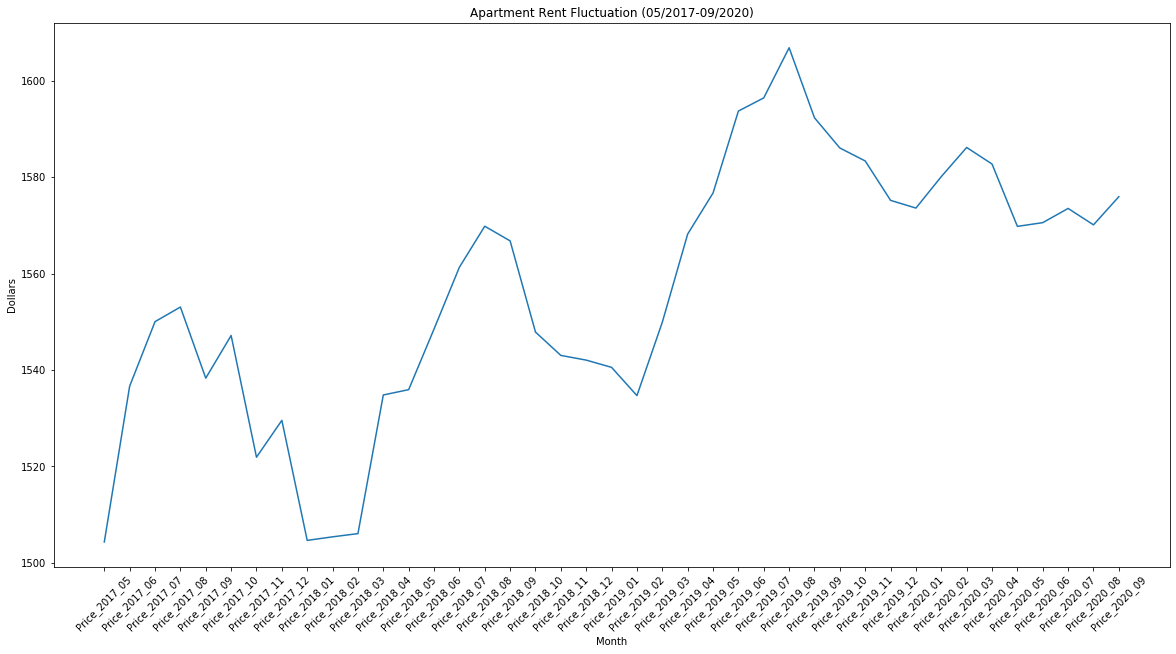

In [149]:
# Average rent graph
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
chart = sns.lineplot(ax=ax, data=avg_rent)
chart.set_xticklabels(labels = avg_rent.index, rotation=45)
chart.set_title('Apartment Rent Fluctuation (05/2017-09/2020)')
ax.set_xlabel("Month")
ax.set_ylabel("Dollars")

In [150]:
# Rents have seen short terms increases and decreases with a long term rise in prices.
# However, this includes the full rent of all apartment sizes. Many people do not pay
# for a several bedroom apartment alone. 

In [151]:
# The following adjusts for a more accurate look of what a renter might pay
# per month. It divides the average rent of an apartment by how many rooms it has.

studio = rent[rent['Bedroom_Size'] == 'Studio'].mean() 
single = rent[rent['Bedroom_Size'] == '1br'].mean()
double = rent[rent['Bedroom_Size'] == '2br'].mean() / 2
triple = rent[rent['Bedroom_Size'] == '3br'].mean() / 3
quad = rent[rent['Bedroom_Size'] == '4br'].mean() / 4

per_person = pd.concat([studio, single, double, triple, quad], axis=1)
per_person.rename(axis = 1, mapper={0:'Studio', 1:'Single', 2:'Double', 3:'Triple', 4:'Quad'}, inplace = True)
per_person.head()

,Studio,Single,Double,Triple,Quad
Price_2017_05,1114.125592,1176.805687,714.702607,581.687204,514.076422
Price_2017_06,1140.569087,1199.779859,730.276347,592.398126,526.298009
Price_2017_07,1150.886525,1212.560284,737.132388,598.236407,529.439125
Price_2017_08,1153.543269,1213.413462,736.691106,600.362981,530.972957
Price_2017_09,1137.515892,1202.075795,728.444988,594.147514,528.165037


Text(0, 0.5, 'Dollars')

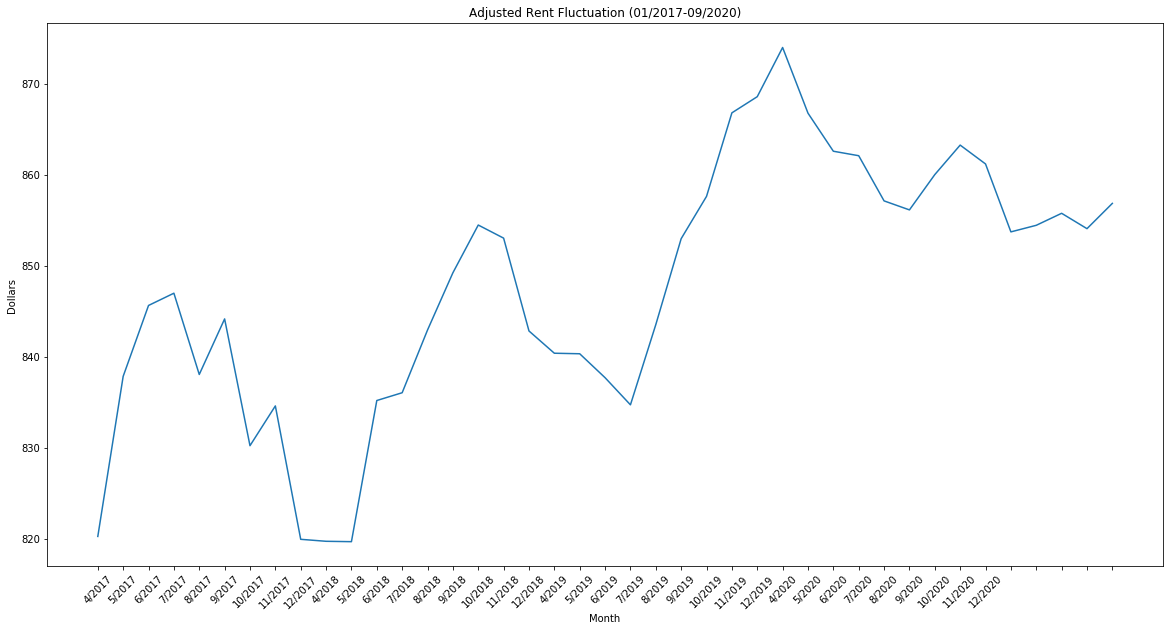

In [152]:
# The following charts changes in rent payments that a renter
# sharing an apartment might pay. It follows the same trend as
# total rent but notice it ranges from around 800 to 900 dollars
# rather than 1450 to 1600 dollars.

dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
chart = sns.lineplot(ax=ax, data=per_person.transpose().mean())
chart.set_xticklabels(labels = dates, rotation=45)
chart.set_title('Adjusted Rent Fluctuation (01/2017-09/2020)')
ax.set_xlabel("Month")
ax.set_ylabel("Dollars")

Text(0, 0.5, 'Dollars')

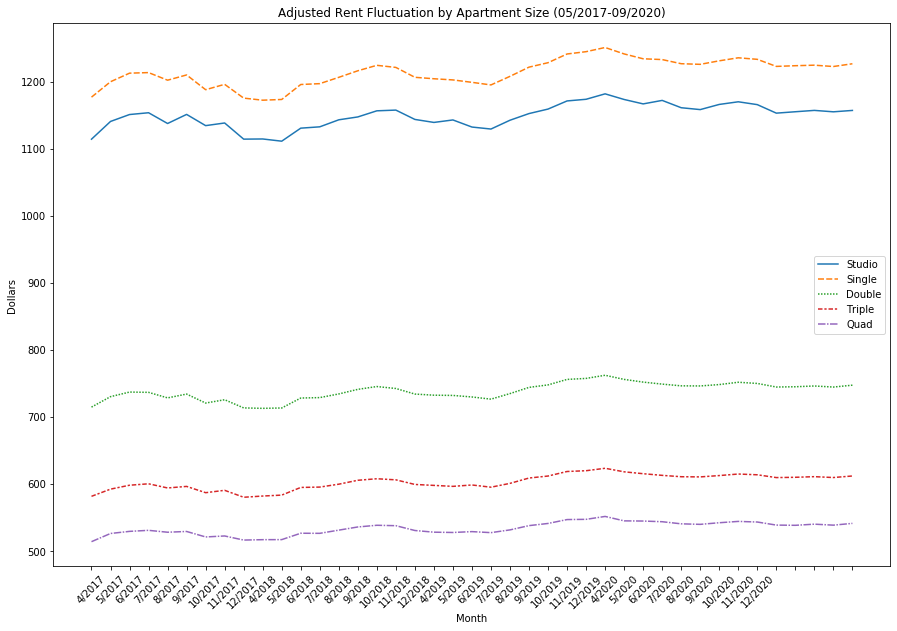

In [153]:
# This graph separates the trends by apartment size. It shows
# adjusted rent to show comparable payments per room since 
# total rent payments for larger apartments would obviously be higher.

dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
chart = sns.lineplot(ax=ax, data=per_person)#.set_title('Rent Fluctuation by Apartment Size 01/2017-09/2020')
chart.set_xticklabels(labels = dates, rotation=45, )
chart.set_title('Adjusted Rent Fluctuation by Apartment Size (05/2017-09/2020)')
ax.set_xlabel("Month")
ax.set_ylabel("Dollars")

In [17]:
# Renters with more roommates pay less rents by splitting rent
# among more people. However, it seems an added benefit is that
# larger apartments have seen more stable rent over time.

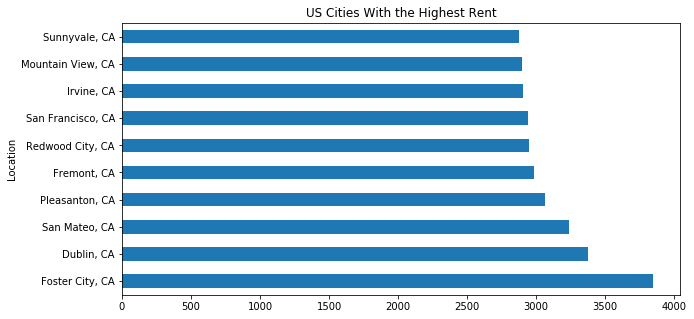

In [155]:
# Now, a look at trends accross the US. 
# What are the most expensive cities?
# S

city = rent.groupby('Location').mean().dropna()
city_avg = city.apply(lambda x:sum(x)/len(x), axis=1).sort_values(ascending=False)
city_avg[:10].plot.barh(x='City', y='Average Rent', figsize=(10,5), title='US Cities With the Highest Rent')

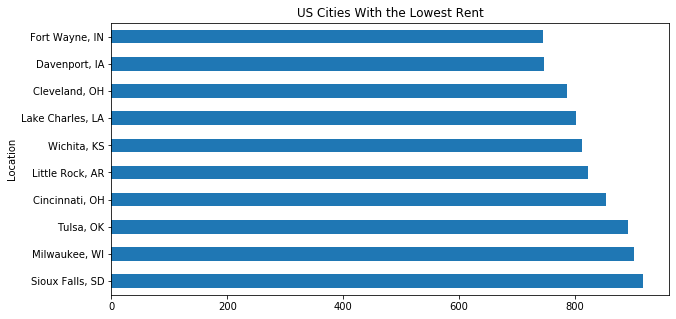

In [156]:
# What are the least expensive cities?

city_avg[-10:].plot.barh(x='City', y='Average Rent', figsize=(10,5), title='US Cities With the Lowest Rent')

In [274]:
# Now I'll look at trends by state.
# State rent data sourced from Apartment List 
# (https://www.apartmentlist.com/research/category/data-rent-estimates)

all_state_rent = pd.read_csv('Rent/Apartment_List_Rent_Data_-_State_2020-9.csv')

In [276]:
# First rows of average state rent data.

state_avg = all_state_rent.groupby('Location').mean()
state_avg.head()

,Price_2017_01,Price_2017_02,Price_2017_03,Price_2017_04,Price_2017_05,Price_2017_06,Price_2017_07,Price_2017_08,Price_2017_09,Price_2017_10,...,Price_2019_12,Price_2020_01,Price_2020_02,Price_2020_03,Price_2020_04,Price_2020_05,Price_2020_06,Price_2020_07,Price_2020_08,Price_2020_09
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,819.2,824.0,829.4,829.6,836.0,842.8,848.2,849.0,853.8,853.2,...,904.4,904.4,906.6,909.0,908.2,908.2,911.2,921.6,932.4,939.0
Alaska,1345.6,1323.8,NaN,NaN,1356.4,1366.0,NaN,1354.4,1330.2,1330.6,...,1359.6,1379.2,1377.0,1390.4,1388.8,1402.2,1396.4,1393.8,1406.6,1414.4
Arizona,1029.8,1023.8,1031.6,1035.0,1040.0,1047.8,1052.0,1053.4,1054.0,1053.6,...,1207.8,1213.0,1218.2,1223.2,1215.8,1204.6,1199.2,1210.4,1226.6,1238.4
Arkansas,761.2,763.6,764.8,765.4,763.8,759.6,750.8,744.6,739.4,737.2,...,769.4,770.8,770.6,772.8,774.2,780.8,787.8,793.6,794.4,795.8
California,1761.4,1775.4,1781.0,1780.8,1795.0,1808.8,1818.8,1820.4,1819.4,1804.8,...,1884.8,1887.6,1896.4,1904.8,1893.4,1873.8,1856.0,1851.4,1842.0,1825.6


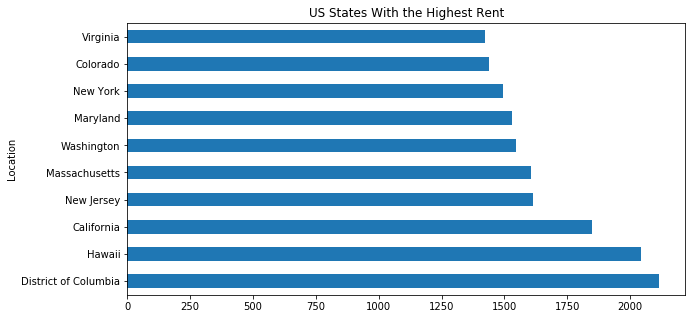

In [277]:
# What are the most expensive states?

state_avg_reduced = state_avg.apply(lambda x:sum(x)/len(x), axis=1).sort_values(ascending=False)
state_avg_reduced[:10].plot.barh(x='State', y='Average Rent', figsize=(10,5), title='US States With the Highest Rent')

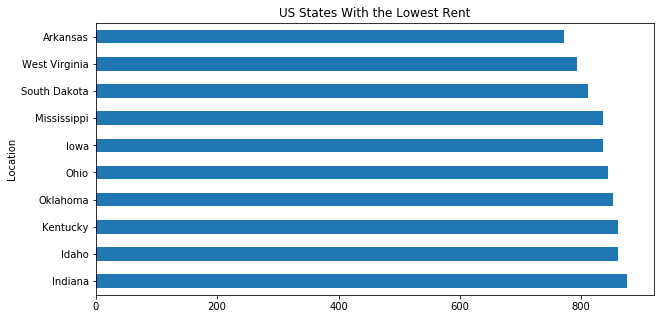

In [279]:
# What are the least expensive states?

lowest = state_avg.dropna(axis=1).apply(lambda x:sum(x)/len(x), axis=1).sort_values(ascending=False)
lowest[-10:].plot.barh(x='State', y='Average Rent', figsize=(10,5), title='US States With the Lowest Rent')

In [280]:
# Is there a relationship between an area's rent and 
# population? Are more populated areas more expensive?
#
# I will look at state data which is more complete 
# than individial city data which may be missing rent values.
#
#
# State population data sourced from US Census Bureau 
# (https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html)

state_populations = pd.read_excel('Rent/nst-est2019-02.xlsx')

In [281]:
# First 10 rows of state population data

new_names = {'Unnamed: 1':'April 1, 2010', 'Unnamed: 2': 'July 1, 2019', 'table with row headers in column A and column headers in rows 3 through 5. (leading dots indicate sub-parts)': 'Region'}
state_pop = state_populations.rename(new_names, axis=1)
#state_pop.index = state_pop['Region']
#state_pop['Region'] = state_pop['Region'].str.replace(r'\.', '')
state_pop.index = state_pop['Region'].str.replace(r'\.', '')
state_pop = state_pop.loc['Alabama':'Wyoming', 'April 1, 2010':'July 1, 2019']
state_pop.head(10)

,"April 1, 2010","July 1, 2019"
Region,,
Alabama,4780125,4903185
Alaska,710249,731545
Arizona,6392288,7278717
Arkansas,2916031,3017804
California,37254519,39512223
Colorado,5029319,5758736
Connecticut,3574147,3565287
Delaware,897937,973764
District of Columbia,601767,705749


In [282]:
# A combination of state rent and population data.
# Since rent data is incomplete and population data has not been 
# updated since 2010, I will use July 2019 which has the most 
# complete rent prices and the most recent population estimates.

state_rent_pop = state_rent.merge(state_pop, left_on = state_rent.index, right_on='Region')
labels = {'Price_2019_07':'Rent', 'July 1, 2019':'Population'}
july_2019 = state_rent_pop[['Region', 'Price_2019_07', 'July 1, 2019']]
july_2019 = july_2019.rename(mapper=labels, axis=1).sort_values(by='Population', ascending=False)
july_2019.head(10)

,Region,Rent,Population
4,California,1911.8,39512223
43,Texas,1196.6,28995881
9,Florida,1383.2,21477737
32,New York,1553.2,19453561
38,Pennsylvania,1025.2,12801989
13,Illinois,1143.0,12671821
35,Ohio,855.6,11689100
10,Georgia,1108.6,10617423
33,North Carolina,1077.2,10488084
22,Michigan,975.2,9986857


Correlation: 0.2897572396722222


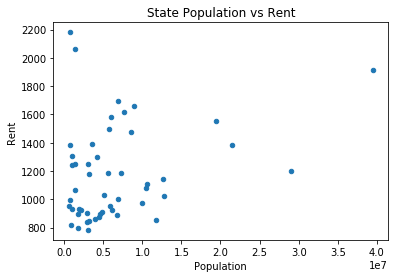

In [283]:
# Plotting state rent against population shows a weak 
# correlation of only about 0.3

cor = july_2019['Rent'].corr(july_2019['Population'].astype('float64'))
print('Correlation:', cor)
july_2019.plot.scatter(x='Population', y='Rent', title='State Population vs Rent')

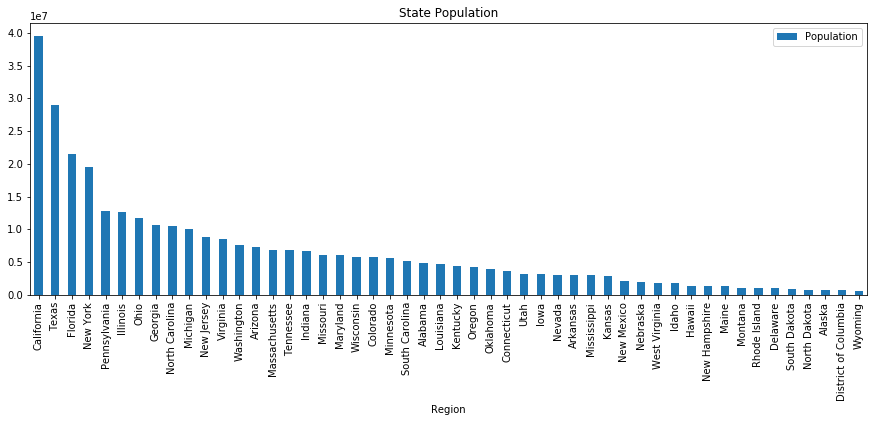

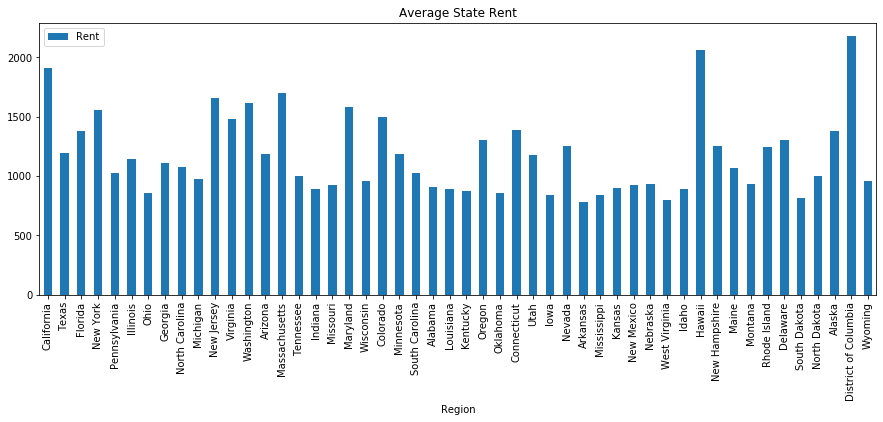

In [284]:
# Demonstrated another way, ranking states by population and then 
# displaying rents in the same order, their is no discernable pattern.
#
# Of course, it's possible there may be a stronger correlation when
# looking at individual cities. This data is more specific as opposed 
# to state rent which mixes in several cities and population centers.
july_2019.plot.bar(x='Region', y='Population', figsize=(15,5), title='State Population')
july_2019.plot.bar(x='Region', y='Rent', figsize=(15,5), title='Average State Rent')

In [285]:
# The previous charts are only a snapshot of national rent
# as they were during July 2019. How has rent changed on
# the scale of individual states from 2017 to 2020?

In [350]:
start = "Price_2017_05"
end = "Price_2020_05"
state_avg['Change in Rent'] = state_avg[end] - state_avg[start]
state_change = state_avg.sort_values(by='Change in Rent', ascending=False)[['Change in Rent']]

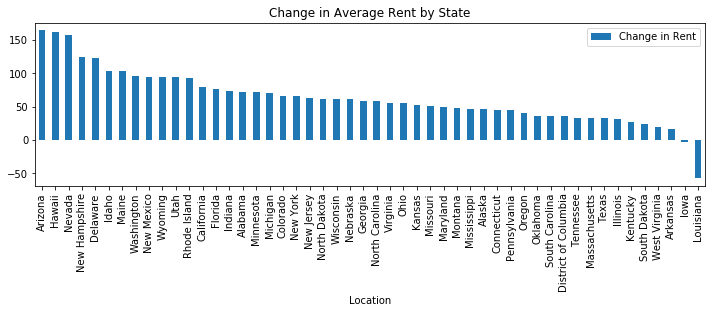

In [351]:
state_change.plot.bar(figsize=(12, 3), title='Change in Average Rent by State')

In [352]:
# Nearly every state except Louisiana saw 
# increasing rent over the past few years.

In [353]:
# This function makes plotting state rent over time easier.

def graph_state(df, state):
    dims = (15, 5)
    fig, ax = plt.subplots(figsize=dims)
    df_mean = df[df['Location']==state].mean()
    chart = sns.lineplot(ax=ax, data=df_mean).set_xticklabels(df_mean.index, rotation=45)
    plt.title(state + ' Rent (01/2017-09/2020)')


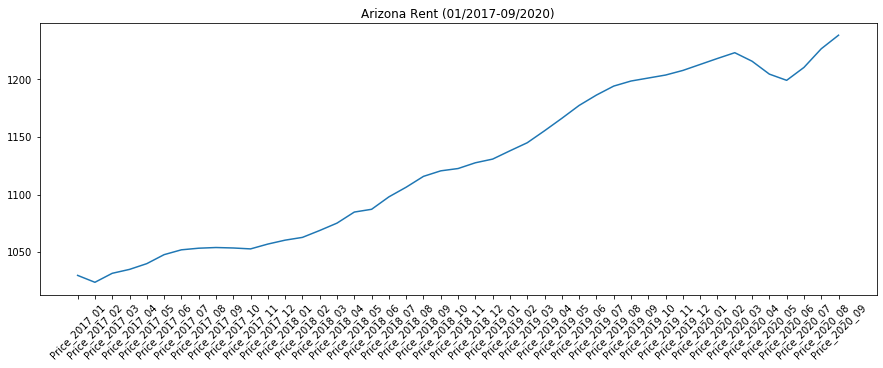

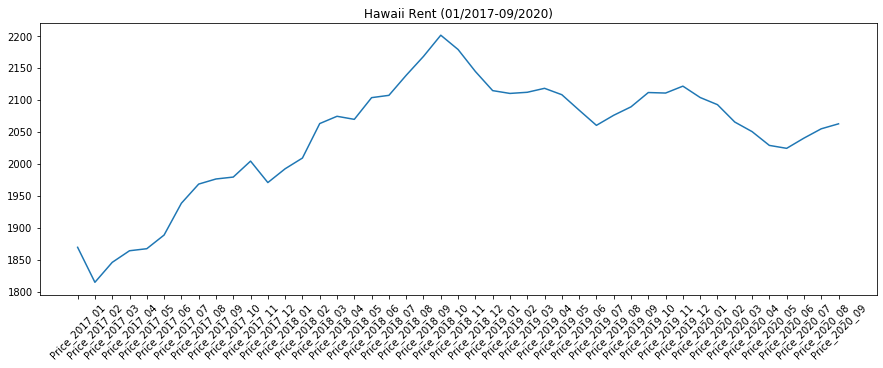

In [354]:
# These are more detailed plots of the states
# with the biggest increases: Nevada and Arizona.

for state in state_change.index[:2]:
    graph_state(all_state_rent, state)

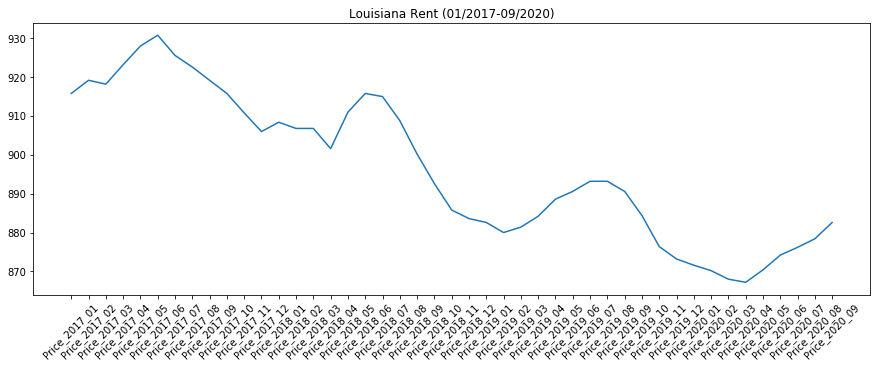

In [356]:
# Lousiana was the only state where rent
# dropped over 3 years.

for state in state_change.index[-1:]:
    graph_state(all_state_rent, state)

In [373]:
# While measuring total change shows which state rents went up
# or down over 3 years, it does not capture the month to month
# or year to year changes. Another useful metric to look at is
# the standard deviation. This will show how volatile or stable
# prices are across the country.

rent_std_dev = state_avg.transpose().std().sort_values(ascending=False)
rent_std_dev

Location
District of Columbia    440.843264
Hawaii                  391.463048
California              368.768941
Massachusetts           330.085126
New Jersey              321.457311
Washington              304.539267
Maryland                302.004825
New York                301.494457
Virginia                282.744318
Colorado                282.694105
Alaska                  280.947481
Connecticut             265.261327
Florida                 259.472450
Oregon                  251.103444
Delaware                239.711339
Rhode Island            233.421591
Texas                   233.056955
New Hampshire           226.373686
Maine                   223.601748
Illinois                222.916210
Minnesota               221.987776
Utah                    215.028014
Nevada                  213.335865
Georgia                 206.138071
Arizona                 204.587496
North Carolina          200.244517
South Carolina          195.371692
Louisiana               194.344320
Pennsylvani

In [37]:
# While DC rent decreased from 01/2017 to 09/2020, it had the 
# least stable rent in the entire US. 
# DC rent rose and fell within a range of around 200 dollars.